# Machine Learning _ 2022.08.31.(수)
과제 2번: Linear Regression  

아래 데이터를 이용하여 각 항목별 연관 관계를 분석하고 선형 회
귀 분석 기법을 통해 상관 관계를 그래프로 표시하시오.

• index_price: 물가지수  
• interest_rate: 이자율   
• unemployment_rate: 실업률  

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
            2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
    'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
    'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
                        1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
                            5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
    'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
                    1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [67]:
# 배열 생성
import numpy as np

year = np.array(df['year'])
month = np.array(df['month'])
interest_rate= np.array(df['interest_rate'])
unemployment_rate= np.array(df['unemployment_rate'])
index_price= np.array(df['index_price'])

# 입력값, 예측값 나누기
variable = np.column_stack((year,month,interest_rate,unemployment_rate))
price = index_price

print(variable.shape)
print(price.shape)
# print(variable[:,5])
# print(price[:,5])

# train , test 나누기
from sklearn.model_selection import train_test_split

train_input_total, test_input_total, train_target, test_target = train_test_split(variable,price, random_state=42)



(24, 4)
(24,)


1. 선형 회귀: 이자율과 물가지수 상관 관계 분석  
- 물가지수와 이자율 산점도 및 선형 회귀 분석

In [68]:
# 사용할 이자율만 추출해서 train, test로 나누고, 2차 배열로 변환
train_input = train_input_total[:,2]
test_input = test_input_total[:,2]
print(train_input.shape)
print(test_input.shape)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 2차 배열 변환 확인
print(train_input.shape)
print(test_input.shape)

# 모델의 기울기, 절편 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

#	기울기(a):	coef_,	절편(bias):	intercept_
print('모 델 기 울 기: ', lr.coef_)
print('모 델  절   편: ', lr.intercept_)

(18,)
(6,)
(18, 1)
(6, 1)
모 델 기 울 기:  [574.45637584]
모 델  절   편:  -127.38255033557039


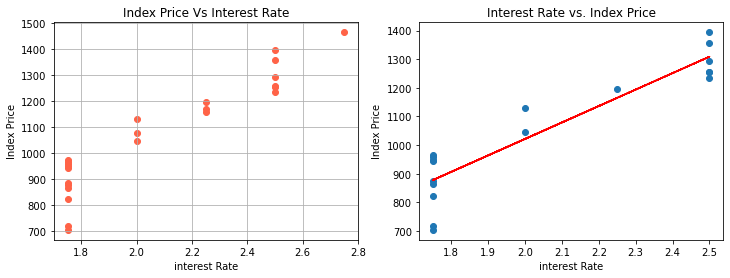

Interest Rate vs. Index Price
coef_:  [574.45637584] intercept_: -127.38255033557039
train data score:  0.8541859618501457
test data score:  0.9418923929450573


In [69]:
# 산점도 및 선형 회귀
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# train+test 산점도
plt.subplot(1,2,1)
plt.title('Index Price Vs Interest Rate')
plt.scatter(train_input,train_target,color='tomato')
plt.scatter(test_input,test_target,color='tomato')
plt.xlabel('interest Rate')
plt.ylabel('Index Price')
plt.grid()

# 회귀선 추가
plt.subplot(1,2,2)
plt.title('Interest Rate vs. Index Price')
plt.scatter(train_input, train_target)
#	plot([x축 데이터:시작, 끝],	[y축 데이터:시작, 끝])
plt.plot(train_input, train_input*lr.coef_ + lr.intercept_, color='red',linestyle='--')
plt.xlabel('interest Rate')
plt.ylabel('Index Price')
plt.show()

# 정확도 체크
print('Interest Rate vs. Index Price')
print('coef_: ', lr.coef_, "intercept_:", lr.intercept_)
print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

2. 다항 회귀: 이자율과 물가지수 상관 관계 분석

In [70]:
# 이자율 제곱 데이터를 훈련 세트에 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly =	np.column_stack((test_input**2,	test_input))

print('1.이자율 제곱 데이터 추가된 훈련세트:\n',train_poly[0:5])
print('2.배열 변화:',train_poly.shape, test_poly.shape)

# 다항 회귀식 구하기 

lr = LinearRegression()
lr.fit(train_poly, train_target)

# 기울기(a):	coef_,	절편(bias):	intercept_
print('모 델 기 울 기: ', lr.coef_)
print('모 델  절   편: ', lr.intercept_)

1.이자율 제곱 데이터 추가된 훈련세트:
 [[3.0625 1.75  ]
 [6.25   2.5   ]
 [3.0625 1.75  ]
 [6.25   2.5   ]
 [6.25   2.5   ]]
2.배열 변화: (18, 2) (6, 2)
모 델 기 울 기:  [-524.84946237 2802.42473118]
모 델  절   편:  -2429.1028225806535


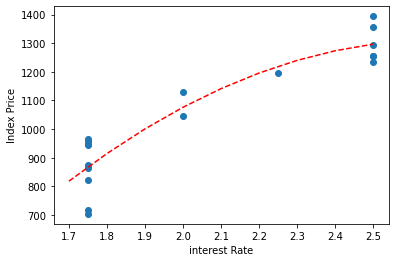

이자율과 물가지수 다항 회귀
다항 회귀 coef_:  [-524.84946237 2802.42473118] intercept_: -2429.1028225806535
다항 회귀 train data score: 0.8676269364555872
다항 회귀 test data score: 0.7945265214367347


In [71]:
# 산점도 및 회귀선
point = np.arange(1.7,2.6,0.1) 

plt.scatter(train_input,train_target)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color='red',linestyle='--')

plt.xlabel('interest Rate')
plt.ylabel('Index Price')
plt.show()

print('이자율과 물가지수 다항 회귀')
print('다항 회귀 coef_: ', lr.coef_, "intercept_:", lr.intercept_)
print('다항 회귀 train data score:', lr.score(train_poly,	train_target))
print('다항 회귀 test data score:', lr.score(test_poly,	test_target))

3. 선형 회귀: 실업률과 물가지수 상관 관계 분석  
- 실업률과 물가지수 산점도 및 선형 회귀 분석

In [72]:
# train, test input 을 실업률 로 설정
train_input = train_input_total[:,3]
test_input = test_input_total[:,3]

print(train_input.shape)
print(test_input.shape)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 2차 배열 변환 확인
print(train_input.shape)
print(test_input.shape)

# 모델의 기울기, 절편 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

#	기울기(a):	coef_,	절편(bias):	intercept_
print('모 델 기 울 기: ', lr.coef_)
print('모 델  절   편: ', lr.intercept_)


(18,)
(6,)
(18, 1)
(6, 1)
모 델 기 울 기:  [-611.41330166]
모 델  절   편:  4586.054631828979


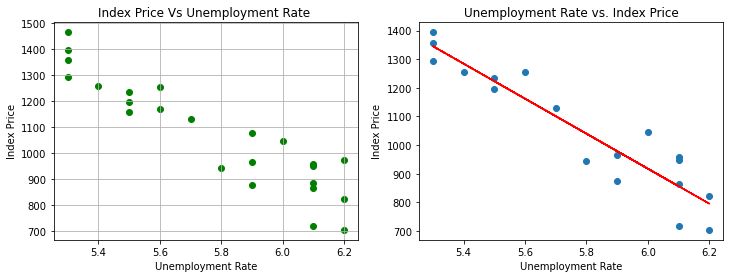

Unemployment Rate vs. Index Price
coef_:  [-611.41330166] intercept_: 4586.054631828979
train data score:  0.8748908875163574
test data score:  0.7074751133772279


In [73]:
# 산점도 및 선형 회귀
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# train + test 산점도
plt.subplot(1,2,1)
plt.title('Index Price Vs Unemployment Rate ')
plt.scatter(train_input, train_target,color='green')
plt.scatter(test_input, test_target,color='green')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.grid()

# 회귀선 추가
plt.subplot(1,2,2)
plt.title('Unemployment Rate vs. Index Price')
plt.scatter(train_input, train_target)
plt.plot(train_input, train_input*lr.coef_ + lr.intercept_, color='red',linestyle='--')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

# 정확도 체크
print('Unemployment Rate vs. Index Price')
print('coef_: ', lr.coef_, "intercept_:", lr.intercept_)
print('train data score: ', lr.score(train_input, train_target))
print('test data score: ', lr.score(test_input, test_target))

In [74]:
# 실업률 제곱 데이터를 훈련 세트에 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly =	np.column_stack((test_input**2,	test_input))

print('1.실업률 제곱 데이터 추가된 훈련세트:\n',train_poly[0:5])
print('2.배열 변화:',train_poly.shape, test_poly.shape)

# 다항 회귀식 구하기 

lr = LinearRegression()
lr.fit(train_poly, train_target)

# 기울기(a):	coef_,	절편(bias):	intercept_
print('모 델 기 울 기: ', lr.coef_)
print('모 델  절   편: ', lr.intercept_)

1.실업률 제곱 데이터 추가된 훈련세트:
 [[34.81  5.9 ]
 [28.09  5.3 ]
 [38.44  6.2 ]
 [31.36  5.6 ]
 [28.09  5.3 ]]
2.배열 변화: (18, 2) (6, 2)
모 델 기 울 기:  [  -7.26428138 -527.97932022]
모 델  절   편:  4347.248197109282


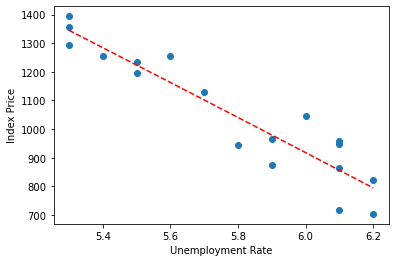

실업률과 물가지수 다항 회귀
다항 회귀 coef_:  [  -7.26428138 -527.97932022] intercept_: 4347.248197109282
다항 회귀 train data score: 0.8748971920999006
다항 회귀 test data score: 0.7057073065929044


In [75]:
# 산점도 및 회귀선
point = np.arange(5.3,6.3,0.1) 
plt.scatter(train_input,train_target)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color='red',linestyle='--')

plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

print('실업률과 물가지수 다항 회귀')
print('다항 회귀 coef_: ', lr.coef_, "intercept_:", lr.intercept_)
print('다항 회귀 train data score:', lr.score(train_poly,	train_target))
print('다항 회귀 test data score:', lr.score(test_poly,	test_target))